### This Notebook go through the all saved pkl and plot the histogram of number of the kernel per row 

In [1]:
import os
import sys
sys.path.append('./Models')
import matplotlib.pyplot as plt
from corn_data import CornData
import concurrent.futures


HYBRID_FOLDER_PATH = "./Data/hybrid_maize/Croped"

def get_image_paths(root_folder):
    # List of image extensions
    image_extensions = ['.pkl']
    
    # List to store image paths
    maize_ear_image_paths = []

    # Walk through the directory
    for subdir, _, files in os.walk(root_folder):
        for file in files:
            # Check if the file is an image
            if any(file.lower().endswith(ext) for ext in image_extensions):
                # Add the file path to the list
                maize_ear_image_paths.append(os.path.join(subdir, file))
    
    return maize_ear_image_paths

In [2]:
pkl_file_paths = (get_image_paths(HYBRID_FOLDER_PATH))

In [3]:
def get_NKR_from_pkl(pkl_path):
    return len(CornData.load_from_file(pkl_path).path_node)

In [4]:
paths_size = []
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Map the process_file function to the list of file paths
    results = list(executor.map(get_NKR_from_pkl, pkl_file_paths))

paths_size.extend(results)

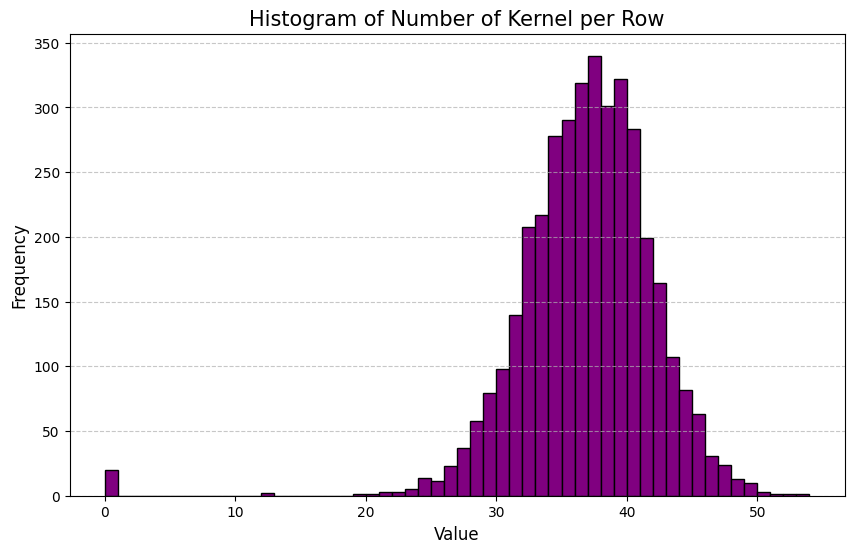

In [10]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(paths_size, bins=range(min(paths_size), max(paths_size) + 2), color='purple', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Number of Kernel per Row', fontsize=15)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customizing the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('NKR_histogram.pdf')
# Display the histogram
plt.show()